# **<font color='crimson'>Сравнение точности двух тестов с бинарным ответом на примере тестов на беременность на основе анализа значений sensitivity и specificity тестов</font>**

---

**Выполнил**: Юмаев Егор

---

## <font color='green'>**1 Описание задачи**</font>

---

В распоряжении имеются сведения о результатах применения двух тестов на беременность с бинарным ответом. Датасет содержит следующие признаки:

 * **y_true** - истинные ответы (1 - беременность есть, 0 - беременности нет)

 * **y_pred1** - результаты, полученные с помощью первого теста

 * **y_pred2** - результаты, полученные с помощью второго теста

Необходимо вычислить **sensitivity** и **specificity** каждого из анализируемых тестов и сделать вывод, какой тест является более точным.

Минимальный обнаруживаемый эффект (**MDE**) у обоих тестов одинаковый и составляет 7 дней с начала беременности.

## <font color='green'>**2 Загрузка необходимых данных**</font>

---

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay)

In [ ]:
# устанавливаем необходимую версию gdown для загрузки датасета
! pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# загружаем данные на Google Drive
! gdown 1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI

Downloading...
From: https://drive.google.com/uc?id=1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI
To: /content/pregnancy.csv
100% 60.0k/60.0k [00:00<00:00, 50.9MB/s]


In [ ]:
# сохраняем данные  в датасет
df = pd.read_csv('/content/pregnancy.csv')

In [ ]:
# выведем размер датасета
len(df), df.shape

(10000, (10000, 3))

In [ ]:
# выведем первые пять строк датасета
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


Данные загружены и готовы для анализа точности результатов применения тестов.

## <font color='green'>**3 Анализ результатов применения тестов**</font>

---

### **3.1 Вычисление процента ошибок**

---

In [ ]:
# процент ошибок для первого теста
test_1_errors = (df['y_true'] != df['y_pred1']).mean()
test_1_errors

0.05

In [ ]:
# процент ошибок для второго теста
test_2_errors = (df['y_true'] != df['y_pred2']).mean()
test_2_errors

0.05

У первого и второго теста доля ошибок совпадает и равна 5%. Можно предположить, что оба теста дают одинаковые результаты. Однако, это значение является лишь самым первым, грубым приближением оценки качества рассматриваемых тестов.

### **3.2 Расчет accuracy**

---

Accuracy (точность) можно рассчитать как 1 (единица) минус доля ошибок.

In [ ]:
# accuracy первого теста
(df['y_true'] == df['y_pred1']).mean()

0.95

**Accuracy** второго теста рассчитаем с помощью библиотеки **sklearn**.

In [ ]:
# accuracy второго теста
accuracy_score(df['y_true'], df['y_pred2'])

0.95

Поскольку доля ошибок у первого и второго тестов совпали, **accuracy** обоих тестов также равны.

### **3.3 Расчет ошибок тестов отдельно для беременных и не беременных**

---

Сформируем два отдельных датасета: отдельно для беременных (в релаьности) и для не беременных (в реальности).

In [ ]:
# датасет со сведениями о беременных
positives = df[df['y_true'] == 1].copy()

In [ ]:
# датасет со сведениями о не беременных
negatives = df[df['y_true'] == 0].copy()

Рассчитаем процент ошибок отдельно для беременных и для не беременных.

#### **3.3.1 False Negative Rate (FNR)**

---


In [ ]:
# рассчитаем процент ошибок для беременных
(positives['y_true'] != positives['y_pred1']).mean()

0.00983284169124877

In [ ]:
# рассчитаем процент ошибок для беременных
(positives['y_true'] != positives['y_pred2']).mean()

0.049164208456243856

Первый тест при определении беременности для реально беременных ошибается примерно в 1 случае из 100, тогда как второй тест допускает почти 5 ошибок на каждые 100 проверок.

#### **3.3.2 False Positive Rate (FPR)**

---


In [ ]:
# рассчитаем процент ошибок для не беременных
(negatives['y_true'] != negatives['y_pred1']).mean()

0.09155645981688708

In [ ]:
# рассчитаем процент ошибок для не беременных
(negatives['y_true'] != negatives['y_pred2']).mean()

0.0508646998982706

Первый тест в 9 случаях из 100 дает ложно положительный результат. Второй тест аналогичную ошибку совершает реже: в 5 испытаниях из 100.

### **3.4 Расчет sensitivity и specificity (чувствительность и специфичность) для каждого теста**

---


Sensitivity и specificity являются accuracy для всех реальных случаев беременности и не беременности.

**Sensitivity** - это accuracy для беременных.

**Specificity** - это accuracy для не беременных.

#### **3.4.1 Расчет sensitivity (чувствительности)**

---



In [ ]:
# sensitivity для первого теста
accuracy_score(positives['y_true'], positives['y_pred1'])

0.9901671583087512

In [ ]:
# sensitivity для второго теста
accuracy_score(positives['y_true'], positives['y_pred2'])

0.9508357915437562

Результат расчета **sensitivity** - это 1 (единица) минус значение **False Positive Rate (FPR)**.

#### **3.4.2 Расчет specificity (специфичности)**

---



In [ ]:
# specificity для первого теста
accuracy_score(negatives['y_true'], negatives['y_pred1'])

0.9084435401831129

In [ ]:
# specificity для второго теста
accuracy_score(negatives['y_true'], negatives['y_pred2'])

0.9491353001017294

Результат расчета **specificity** - это 1 (единица) минус значение **False Negative Rate (FNR)**.

**Sensitivity** показывает, насколько точно тест выявляет беременных.

**Specificity** показывает, насколько точен тест в оценке того, что беременности нет.

### **3.5 Единая функция посчета Sensitivity и Specificity теста из библиотеки sklearn**

---



Для дальнейшей оценки целесообразно применить единую функцию подсчета метрик качества теста. Для этого подходит встроенная метрика библиотеки **sklearn**, а именно: **recall_score**.

По умолчанию метрика **recall_score** библиотеки **sklearn** - это **Sensitivity**.

In [ ]:
# sensitivity для первого теста
recall_score(df['y_true'], df['y_pred1'])

0.9901671583087512

In [ ]:
# sensitivity для второго теста
recall_score(df['y_true'], df['y_pred2'])

0.9508357915437562

Чтобы посчитать **sensitivity** при вызове втроенной в **sklearn** метрики **recall_score** необходимо добавить дополнительный параметр **pos_label**. По умолчанию этот параметр равен 1. Параметр **pos_label** определяет, для чего мы считаем **recall**.

Если **pos_label = 1**, то расчет ведется для положительных явлений (единиц).

Если **pos_label = 0**, то расчет ведется для отрицательных явлений (нулей).

Таким образом:

In [ ]:
# specificity для первого теста
recall_score(df['y_true'], df['y_pred1'], pos_label=0)

0.9084435401831129

In [ ]:
# specificity для второго теста
recall_score(df['y_true'], df['y_pred2'], pos_label=0)

0.9491353001017294

### **3.6 Confusion Matrix**

---



Рассмотрим **матрицу ошибок** первого и второго теста.

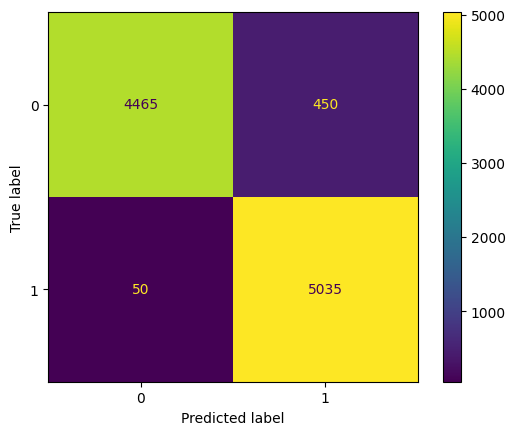

In [ ]:
# матрица ошибок первого теста
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

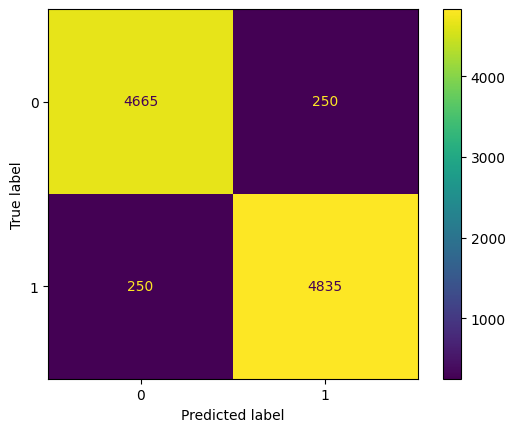

In [ ]:
# матрица ошибок второго теста
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Ложно положительных срабатываний (**False Positive Rate**) больше у первого теста. Ложно отрицательных срабатываний (**False Negative Rate**) больше у второго теста.

Для более детального анализа можно получить значения, используемые для построения матрицы ошибок. Получим их для второго теста:

In [ ]:
confusion_matrix(df['y_true'], df['y_pred2'])

array([[4665,  250],
       [ 250, 4835]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()
print(tn, fp, fn, tp)

4665 250 250 4835


Для примера рассчитаем **sensitivity** 2-го теста по формуле:

\begin{align}
\mathbf{TPR} = \frac{\mathbf{TP}}{\mathbf{TP} + \mathbf{FN}}
\end{align}

In [ ]:
tp / (tp + fn)

0.9508357915437562

### <font color='mediumblue'>**4 Итоги сравнения точности двух тестов на беременность**</font>

---



Обобщающий итог сравнения точности двух тестов на беременность можно выполнить с помощью функции **groupby** библиотеки **pandas**. Для этого создадим в датасете **df** два дополнительных столбца, отражающих точность предсказаний каждого теста.

In [ ]:
# создаем столбец с информацией о точности предсказаний первого теста
df['accuracy_1'] = df['y_true'] == df['y_pred1']

In [ ]:
# создаем столбец с информацией о точности предсказаний второго теста
df['accuracy_2'] = df['y_true'] == df['y_pred2']

In [ ]:
# создаем сводную таблицу, отражающую точность каждого из тестов
res = df.groupby('y_true')[['accuracy_1', 'accuracy_2']].mean().reset_index()
res

,y_true,accuracy_1,accuracy_2
0,0,0.908444,0.949135
1,1,0.990167,0.950836


Строка, соответствующая значению **1** (реальная беременность) соотносится с показателем **'Sensitivity'** (чувствительность). Выявляет, насколько точно тест реально беременных относит к беременным.

Строка, соответствующая значению **0** (реальное отсутствие беременности) соотносится с показателем **'Specificity'** (специфичность). Выявляет, насколько точно тест реально **не** беременным дает отрицательный результат.

Все тесты сравниваются между собой по трем метрикам.

Оценивая качество измерений теста, мы руководствуемся тем, что метрики теста должны быть:

* **Minimal Detectable Effect (MDE)** - минимальный, т.е. тест должен быть способен улавливать даже небольшие различия.

* **Sensitivity** - максимальный, т.е. применительно к особенности рассматриваемых тестов тест должен точно выявлять беременность.

* **Specificity** - максимальный, т.е. применительно к особенности рассматриваемых тестов тест должен корректно указывать на отсутствие беременности там, где ее действительно нет.

Идеальный тест обнаруживает самый минимальный **MDE**, какой возможен, 100%-ую точность **'Sensitivity'**, 100-ую точность **'Specificity'**. В реальной жизни чем лучше характеристики теста, тем он стоит дороже.

Согласно вводных условий **MDE** обоих тестов одинаковый и составляет 7 дней (т.е. тесты целесообразно применять через неделю после начала предполагаемой беременности). Чем меньше **MDE**, тем лучше. Однако, нереалистично ожидать, что тест на беременность даст точную оценку через несколько часов или даже через день после начала беременности. С другой стороны, например, на 4-й месяц вероятнее всего любой тест на беременность даст 100% точный результат, но необходимость его применения на этом этапе лишена смысла. Т.к. **MDE** обоих тестов одинаков, сравнивать их качество необходимо по расчитанным значениям **Sensitivity** и **Specificity**.

Видим, что первый тест лучше выявляет случаи, когда беременность реально есть, но уступает второму тесту в определении отсутствия беременности, когда ее реально нет.

Оценивая результаты точности предсказаний того или иного теста, необходимо понимать, что важнее: или **'Sensitivity'**, или **'Specificity'**, или **'Sensitivity'** и **'Specificity'** важны в равной мере.



В случае оценки точности теста на беременность **'Sensitivity'** значительно важнее, чем **'Specificity'**:

* если беременность реально есть, сразу же необходимо корректировать режим жизни и питания будущей матери. В случае, когда беременность есть, а тест указал на ее отсутствие, корректировка образа жизни и питания на ранних стадиях не проводится, а значит, повышаются риски как для будущей матери, так и для ребенка (**'Sensitivity'** или **True Positive Rate**);

* если беременности реально нет, а тест указал на ее наличие, последующие контрольные проверки покажут ее отсутствие, риски в этой ситуации минимальны или, скорее, отсутствуют (**'Specificity'** или **True Negative Rate**).

Таким образом, сравнение результатов определения беременности или ее отсутствия двух тестов показывает, что лучшим является первый тест, дающий наибольшую из двух тестов точность выявления беременности в случаях, когда она действительно есть.